In [2]:
#!pip install folium

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_school_info = pd.read_excel('../Datasets/2023년_학교기본정보_부산광역시교육청.xlsx')
df_school_info["지역"] = df_school_info["지역"].str.replace("부산광역시 ", "")
df_school_info["지역"]

0      연제구
1       중구
2       중구
3       남구
4       남구
      ... 
313    강서구
314    강서구
315    기장군
316    기장군
317    강서구
Name: 지역, Length: 318, dtype: object

In [3]:
import matplotlib.font_manager as fm
 
# list로 모든 폰트 확인
fl = [font.name for font in fm.fontManager.ttflist]
fl

# !mv ../Datasets/NanumGothic.ttf /home/wp/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/fonts
# !fc-cache -fv
#!ls -al /home/wp/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/fonts

#!ls -la /home/wp/.cache/matplotlib

['DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeFourSym',
 'cmsy10',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmr10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmmi10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmb10',
 'cmex10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'cmtt10',
 'cmss10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'Ubuntu',
 'NTR',
 'KacstScreen',
 'Ubuntu',
 'NanumMyeongjo',
 'Sarai',
 'Rasa',
 'Ubuntu Condensed',
 'Mallanna',
 'Ubuntu',
 'DejaVu Serif',
 'FreeSerif',
 'FreeSans',
 'Nanum Pen Script',
 'C059',
 'Nimbus Mono PS',
 'Source Code Pro',
 'Ubuntu Mono',
 'Mukti',
 'Noto Sans CJK JP',
 'Manjari',
 'Kinnari',
 'Source Code Pro',
 'URW Goth

<Axes: xlabel='지역', ylabel='count'>

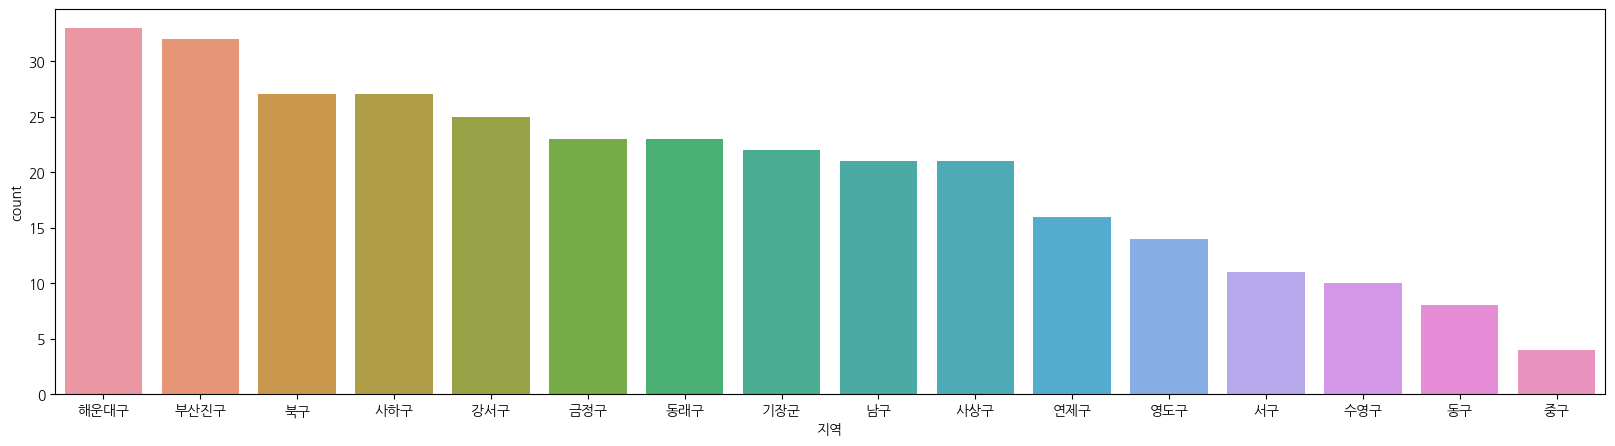

In [4]:
# 지역구별 학교 개수 barplot


plt.figure(figsize=(20,5))
plt.rcParams['font.family'] = 'NanumGothic'
# 한글이 깨지는 오류를 수정하기 위해 아래와 같은 코드 첨부

#sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='white')
# font_path = 'NanumGothic'

# # 폰트 이름 가져오기
# font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
# plt.rc('font', family=font_name)

# df_school_info의 지역을 기준으로 groupby 진행 후 해당 지역에 대한 count를 새 column으로 지정해줌
df_school_info_group_by_city = df_school_info[["지역"]].groupby(["지역"])["지역"].count().sort_values(ascending=False).reset_index(name="count")

sns.barplot(data=df_school_info_group_by_city, x="지역", y="count")

In [5]:
# 지역(구)별 학교 개수 folium(Choropleth)
import folium       
from folium import plugins
import json

geo_path = "../Datasets/busan_gu.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location = [35.1856505,129.1], zoom_start=9)

df = df_school_info[["지역"]].groupby(["지역"])["지역"].count().sort_values(ascending=False)

choropleth = folium.Choropleth(
    name="지역구",
    geo_data = geo_str, 
    data = df,
    #columns = [df_school_info_group_by_city.index, df_school_info_group_by_city["count"]],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='(구) 별 학교 분포',
    key_on='properties.name'
).add_to(map)

for idx, data in enumerate(geo_str['features']):
    id = data['id']
    count = df[idx]
    data['properties']['tooltip1'] = f'<h4>{id}</h4><br/><h5>학교개수: {count}</h5>'

# 지도 전체화면 추가코드
plugins.Fullscreen(position='topright',
                  title='Click to Expand',
                  title_cancel='Click to Exit',
                  force_separate_button=True).add_to(map)
    
plugins.MousePosition().add_to(map)

choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['tooltip1'], labels=False))
# title_html='<div>안녕</div>'
# map.get_root().html.add_child(folium.Element(title_html))
folium.LayerControl().add_to(map)

map


In [6]:
# 학교별의 위치를 지도(마커)로 표현

location = df_school_info[["위도", "경도"]]
location.head(5)

map= folium.Map(location=[35.194573, 129.075497], zoom_start=11, titles='Stamen Toner')

for idx, ser in location.iterrows():
    if ser["위도"] > 0 and ser["경도"]:
        folium.Marker(location=[ser["위도"], ser["경도"]]).add_to(map)
    
map